# Introduction

# Telco Customer Churn Analysis: IBM Dataset

This project analyzes customer churn data from a fictional telecommunications company that provided home phone and Internet services to 7,043 customers in California during Q3.Also this project creates a predictive model which predicts chances of customer churn.Conducted in a Jupyter Notebook, the project involves scoping, cleaning, analyzing, and visualizing the data to uncover underlying trends and then using it for Predictive ML model.

Through exploratory data analysis—using correlation matrices, chi-square tests, and other statistical methods—we seek to answer key questions, including:  
- What is the most popular reason for customers canceling their subscription?  
- When do cancellations most commonly occur?  
- Are the correlations between these factors statistically significant?  
- How do monthly charges affect the overall duration of subscriptions?  
- How does the type of subscription contract influence churn?
- Whats is the most common month to cancel the subscription?

Additional questions and insights will also be addressed as part of this comprehensive analysis.

**Data sources:**

`Telco_customer_churn.xlsx` was provided by **IBM**
This dataset is detailed in: https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

Downloaded from: https://community.ibm.com/accelerators/?context=analytics&query=telco%20churn&type=Data&product=Cognos%20Analytics

The data for this project is *inspired* by real data.

## Import Python Modules
Here are the primary modules that will be used in this project:


In [409]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline


## Getting data to know

Data Description
7043 observations with 33 variables

**CustomerID:** A unique ID that identifies each customer.

**Count:** A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

**Country:** The country of the customer’s primary residence.

**State:** The state of the customer’s primary residence.

**City:** The city of the customer’s primary residence.

**Zip Code:** The zip code of the customer’s primary residence.

**Lat Long:** The combined latitude and longitude of the customer’s primary residence.

**Latitude:** The latitude of the customer’s primary residence.

**Longitude:** The longitude of the customer’s primary residence.

**Gender:** The customer’s gender: Male, Female

**Senior Citizen:** Indicates if the customer is 65 or older: Yes, No

**Partner:** Indicate if the customer has a partner: Yes, No

**Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**Tenure Months:** Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

**Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract:** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing:** Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge:** Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn Label:** Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

**Churn Value:** 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

**Churn Score:** A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

**CLTV:** Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

**Churn Reason:** A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [413]:
db=pd.read_excel('Telco_customer_churn.xlsx')
db

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


Check for Null variables

In [415]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Data Cleanning and Preprocessing

In [417]:
db.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

So only data missing is in **Churn Reason** which tells us that 5174 kept their subscription while the rest didn't.

So,let's start with data tidying. I will check some columns in the table that in our case can be irrelevant and take them out of dataframe.

In [423]:
db['Count'].value_counts()

Count
1    7043
Name: count, dtype: int64

In [425]:
db=db.drop(columns='Count')

In [427]:
db['Country'].unique()


array(['United States'], dtype=object)

So each customer is from US which makes this column not important in our analysis so i drop it

In [430]:
db=db.drop(columns='Country')

In [432]:
db['State'].unique()

array(['California'], dtype=object)

Same thing drop it

In [435]:
db=db.drop(columns='State')

In [437]:
db['Senior Citizen'].unique()

array(['No', 'Yes'], dtype=object)

In [439]:
db['Total Charges'].unique()
print(db['Total Charges'].unique())
unique_values = db['Total Charges'].unique()



[108.15 151.65 820.5 ... 7362.9 346.45 6844.5]


In [441]:
# Convert 'Total Charges' to numeric, errors='coerce' will turn non-numeric values into NaN
db['Total Charges'] = pd.to_numeric(db['Total Charges'], errors='coerce')

# Handle missing values in Total Charges (NaNs)
db['Total Charges'] = db['Total Charges'].fillna(db['Total Charges'].median())

Finally,we can see all possible reasons for subscription cancellation

In [444]:
print(db["Churn Reason"].unique())

['Competitor made better offer' 'Moved' 'Competitor had better devices'
 'Competitor offered higher download speeds'
 'Competitor offered more data' 'Price too high' 'Product dissatisfaction'
 'Service dissatisfaction' 'Lack of self-service on Website'
 'Network reliability' 'Limited range of services'
 'Lack of affordable download/upload speed' 'Long distance charges'
 'Extra data charges' "Don't know" 'Poor expertise of online support'
 'Poor expertise of phone support' 'Attitude of service provider'
 'Attitude of support person' 'Deceased' nan]


Now,I will create visualization of missing data,just to make point visible with which types of data I will work

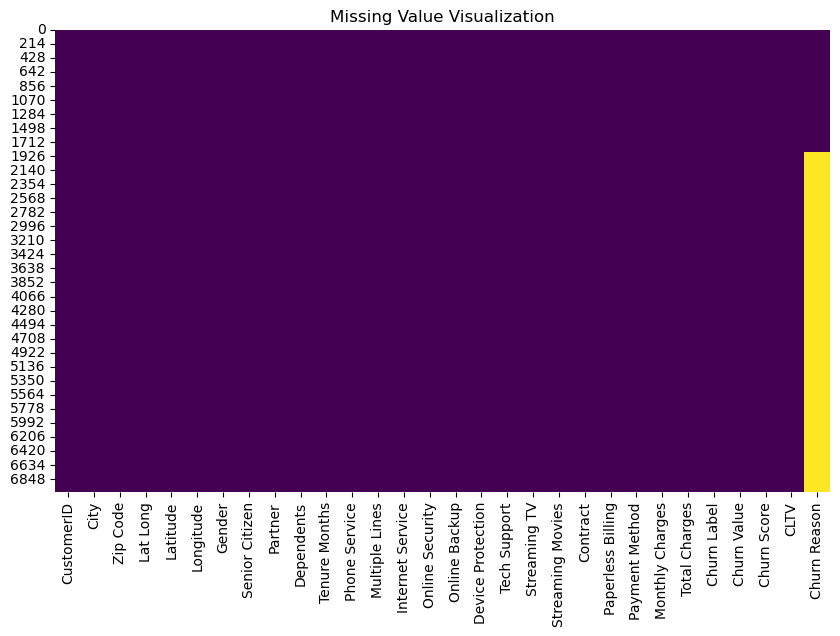

In [447]:
plt.figure(figsize=(10, 6))
sns.heatmap(db.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Visualization')
plt.show()

Quickly understanding the distribution and central characteristics of this data

In [450]:
db.describe()

,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,93521.964646,36.282441,-119.798880,32.371149,64.761692,2281.916928,0.265370,58.699418,4400.295755
std,1865.794555,2.455723,2.157889,24.559481,30.090047,2265.270398,0.441561,21.525131,1183.057152
min,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,92102.000000,34.030915,-121.815412,9.000000,35.500000,402.225000,0.000000,40.000000,3469.000000
50%,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


I want to check scatter plot of monthly charges and total charges how does it look like

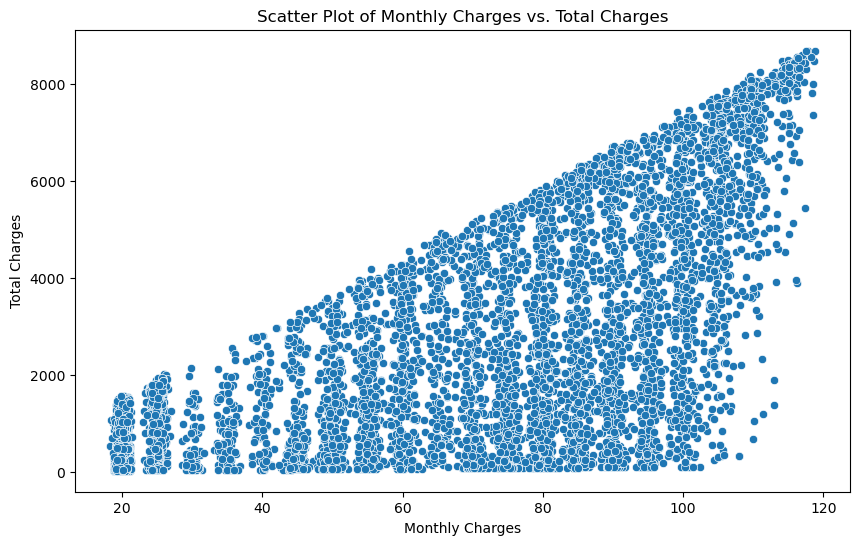

In [453]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Monthly Charges', y='Total Charges', data=db)
plt.title('Scatter Plot of Monthly Charges vs. Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


I want to check all kinds of different distributions  using histograms

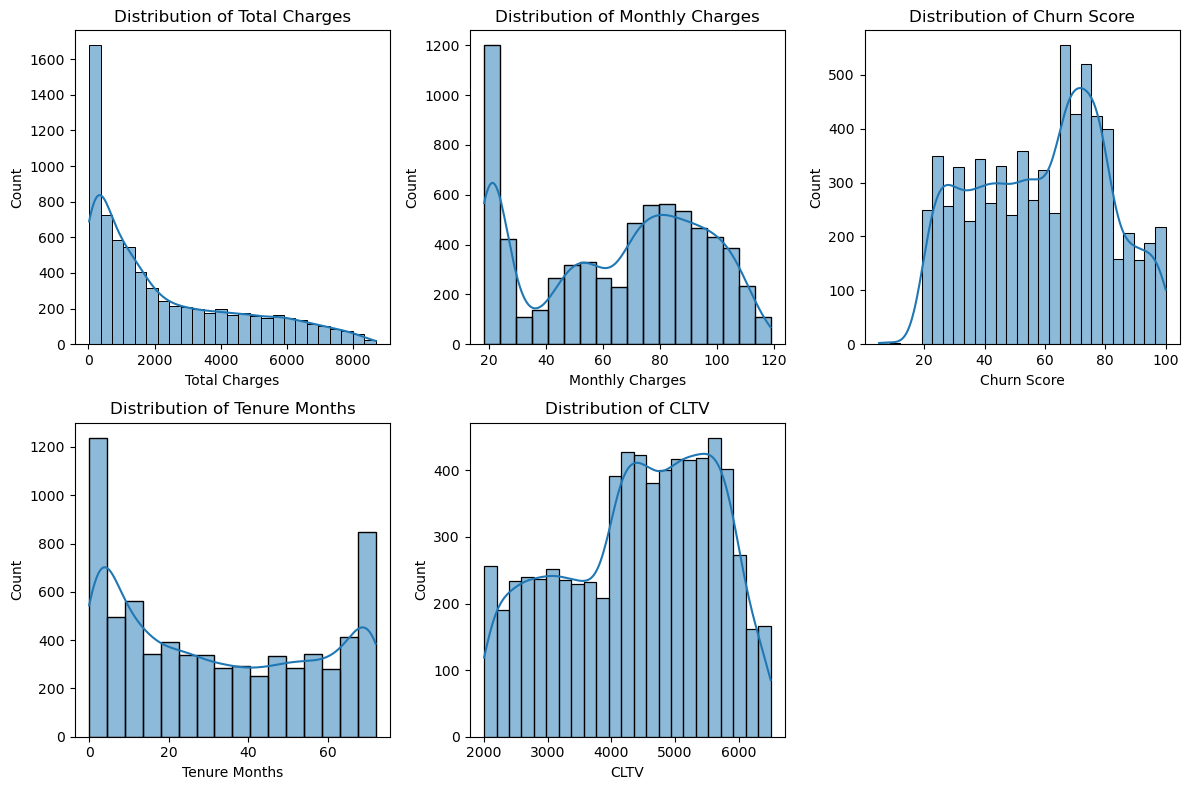

In [456]:
def distribution_numerical(data, x, index):
    plt.subplot(2, 3, index)
    sns.histplot(data=data, x=x, kde=True)
    plt.title(f"Distribution of {x}")  
    plt.tight_layout()

numerical_columns = ['Total Charges', 'Monthly Charges', 'Churn Score', 'Tenure Months', 'CLTV']

fig = plt.figure(figsize=(12, 8))

for index, col in enumerate(numerical_columns):
    distribution_numerical(db, col, index + 1)

plt.show()

Now i want to plot most popular reason of cancelling subscription:

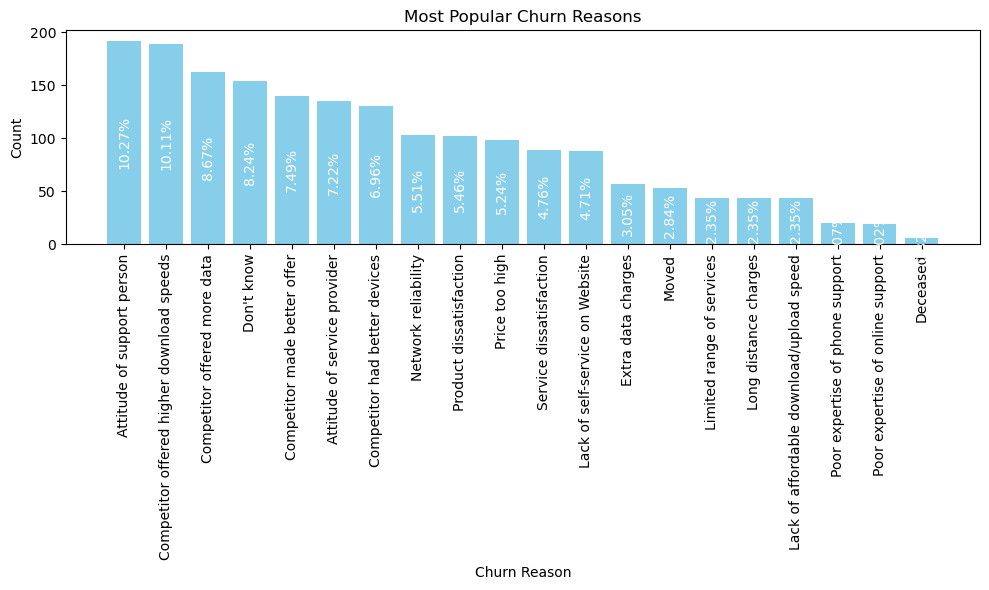

In [459]:
churn_reason_counts = db['Churn Reason'].dropna().value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(churn_reason_counts.index, churn_reason_counts.values, color='skyblue')
plt.xlabel("Churn Reason")
plt.ylabel("Count")
plt.title("Most Popular Churn Reasons")
plt.xticks(rotation=90)  


total_count = churn_reason_counts.sum()


for bar, count in zip(bars, churn_reason_counts.values):
    height = bar.get_height()
    percentage = (count / total_count) * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height / 2,                        
        f'{percentage:.2f}%',              
        ha='center', 
        va='center',
        color='white',                     
        fontsize=10,
        rotation=90                        
    )

plt.tight_layout()
plt.show()


We can clearly see why we losing customers
Let's find out about which amounts in losses it could lead

In [462]:
#averages
avg_total_charges = db['Total Charges'].mean()
avg_monthly_charges = db['Monthly Charges'].mean()

print("Average Total Charges:", avg_total_charges,"$")
print("Average Monthly Charges:", avg_monthly_charges,"$")

null_percentage = (db["Churn Reason"].isnull().sum() / len(db)) * 100
cancel=(len(db)-db["Churn Reason"].isnull().sum())
print("Average loss on Monthly Charges:",cancel*avg_monthly_charges,"$")
print("Average loss on Total Charges:",cancel*avg_total_charges,"$")

Average Total Charges: 2281.9169281556156 $
Average Monthly Charges: 64.76169246059918 $
Average loss on Monthly Charges: 121039.60320885986 $
Average loss on Total Charges: 4264902.738722846 $


We loosing such amount of money because of Attitude of support person as a reason number 1! then we have: competitors,download speeds,less data,attitude of service provider,product dissatisfaction,service dissatisfaction,price etc.

Generating Map with spread of each customer to see which types of contract are most likely to become a churn value using plotly

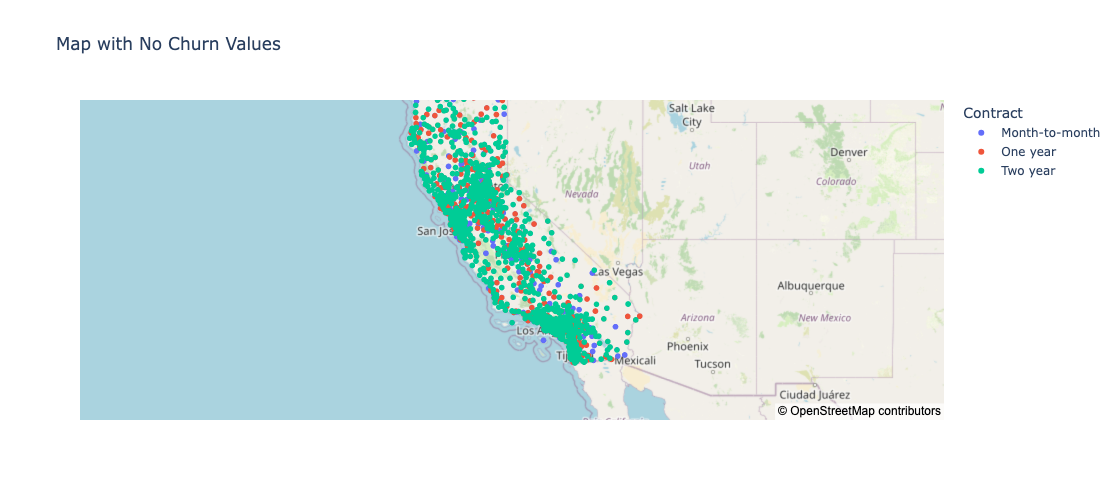

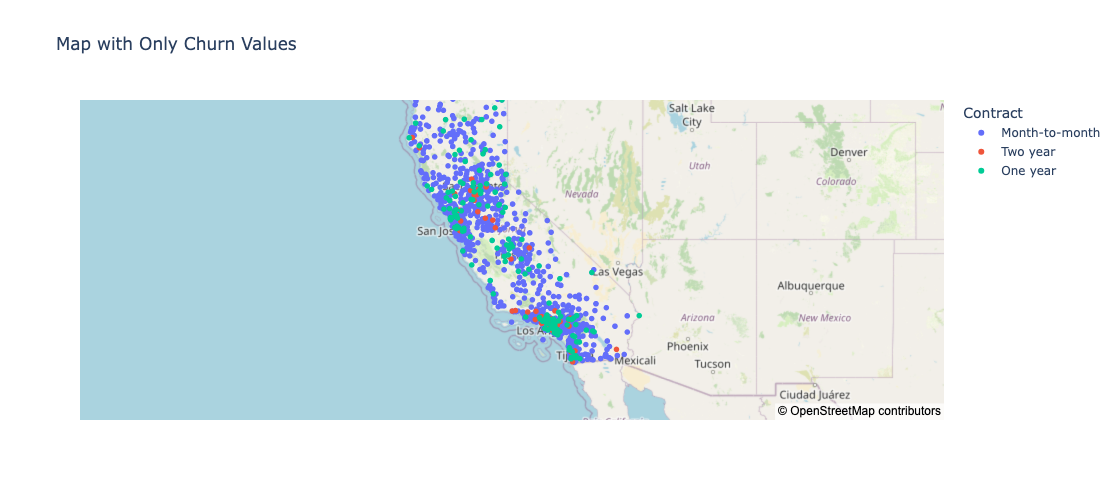

In [466]:
def generate_map_trace(data, color, width, height, title):
    
    fig = px.scatter_mapbox(
        data,
        lat='Latitude',
        lon='Longitude',
        color=color,
        hover_name='CustomerID', 
        zoom=4,                   
        height=height,
        width=width,
        title=title
    )
    
    
    fig.update_layout(mapbox_style="open-street-map")
    fig.show()


churn_value = pd.DataFrame()
churn_value["Churn Value"] = db["Churn Value"].map({0: "No Churn", 1: "Churn"})
churn_value[[col for col in db.columns if col != 'Churn Value']] = db[[col for col in db.columns if col != 'Churn Value']]


color = 'Contract'


generate_map_trace(
    churn_value[churn_value['Churn Value'] == 'No Churn'],
    color=color, width=900, height=500, title='Map with No Churn Values'
)
generate_map_trace(
    churn_value[churn_value['Churn Value'] == 'Churn'],
    color=color, width=900, height=500, title='Map with Only Churn Values'
)



From this map is clearly visible that Customers with two year and one year contracts almost never canceling and provide company with most amount of money which is obvious.

Count of customers who complete the purchase vs those who churn:
Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

Average spending by churn status:
Churn Label
No     2552.882494
Yes    1531.796094
Name: Total Charges, dtype: float64

Average spending by tenure for churned and non-churned customers:
    Churn Label  Tenure Months  Total Charges
0            No              0    1397.475000
1            No              1      37.909013
2            No              2      95.997391
3            No              3     152.135849
4            No              4     182.525806
..          ...            ...            ...
140         Yes             68    6720.550000
141         Yes             69    6887.931250
142         Yes             70    6803.995455
143         Yes             71    6765.908333
144         Yes             72    7039.150000

[145 rows x 3 columns]


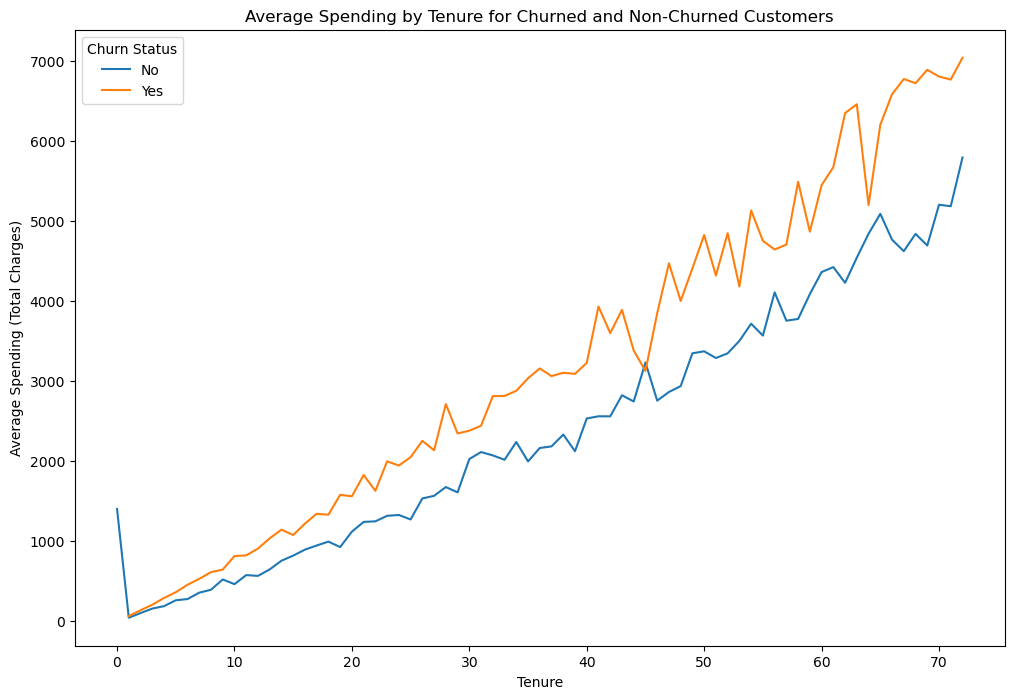

In [469]:
# Counting customers who complete the purchase versus those who do not
churn_counts = db['Churn Label'].value_counts()
print("Count of customers who complete the purchase vs those who churn:")
print(churn_counts)

# Calculate average spending for customers based on churn status
average_charges_by_churn = db.groupby('Churn Label')['Total Charges'].mean()
print("\nAverage spending by churn status:")
print(average_charges_by_churn)

# Calculate average spending based on tenure for loyal and non-loyal customers to see dependence
average_charges_by_tenure = db.groupby(['Churn Label', 'Tenure Months'])['Total Charges'].mean().reset_index()
print("\nAverage spending by tenure for churned and non-churned customers:")
print(average_charges_by_tenure)

#Creating line plot based on that info
db = db.replace([np.inf, -np.inf], np.nan)
plt.figure(figsize=(12, 8))
sns.lineplot(data=average_charges_by_tenure, x='Tenure Months', y='Total Charges', hue='Churn Label')
plt.title('Average Spending by Tenure for Churned and Non-Churned Customers')
plt.xlabel('Tenure')
plt.ylabel('Average Spending (Total Charges)')
plt.legend(title='Churn Status')
plt.show()

We can see that loyal customers paying almost same amount as churned ones! It looks not that obvious, but to set up the contract they pay I assume some kind of fee which leads in huge spending on first month then it comesback to normal.

FInding out more about churned customers

In [473]:
# Filter for churned customers
churned_customers = db[db['Churn Label'] == 'Yes']

# average tenure in months for churned customers
avg_tenure = churned_customers['Tenure Months'].mean()
print("Average Tenure Months for Churned Customers:", avg_tenure)


# finding most popular tenure month among churned customers
most_popular_tenure = churned_customers['Tenure Months'].value_counts().idxmax()
popular_tenure_count = churned_customers['Tenure Months'].value_counts().max()
print("Most Popular Tenure Month for Churned Customers:", most_popular_tenure, 
      f"({popular_tenure_count} occurrences)")


Average Tenure Months for Churned Customers: 17.979133226324237
Most Popular Tenure Month for Churned Customers: 1 (380 occurrences)


That's very important it tells us that most customers leave in the first month of their month-to-month subscription because of the reasons above. Now, I can find out the correlation on this matter between the reasons, which will allow the company to fix it which potentially could lead to great success because as we can see even for churned customers, the average tenure months is almost 18!!! So that means if we can hold our new customers to more than 1 month that could lead to a higher probability of prolonging their stay up to 17 months and more! 
Which on average could lead to 2175081.6$ in profit! 

Correlation Matrix:
                 Zip Code  Latitude  Longitude  Tenure Months  \
Zip Code         1.000000  0.895743  -0.784271       0.001041   
Latitude         0.895743  1.000000  -0.876779      -0.001631   
Longitude       -0.784271 -0.876779   1.000000      -0.001678   
Tenure Months    0.001041 -0.001631  -0.001678       1.000000   
Monthly Charges -0.004596 -0.019899   0.024098       0.247900   
Total Charges   -0.001237 -0.010168   0.008977       0.825464   
Churn Value      0.003346 -0.003384   0.004594      -0.352229   
Churn Score     -0.002769 -0.007684   0.004260      -0.224987   
CLTV            -0.003562  0.000886   0.000485       0.396406   

                 Monthly Charges  Total Charges  Churn Value  Churn Score  \
Zip Code               -0.004596      -0.001237     0.003346    -0.002769   
Latitude               -0.019899      -0.010168    -0.003384    -0.007684   
Longitude               0.024098       0.008977     0.004594     0.004260   
Tenure Months        

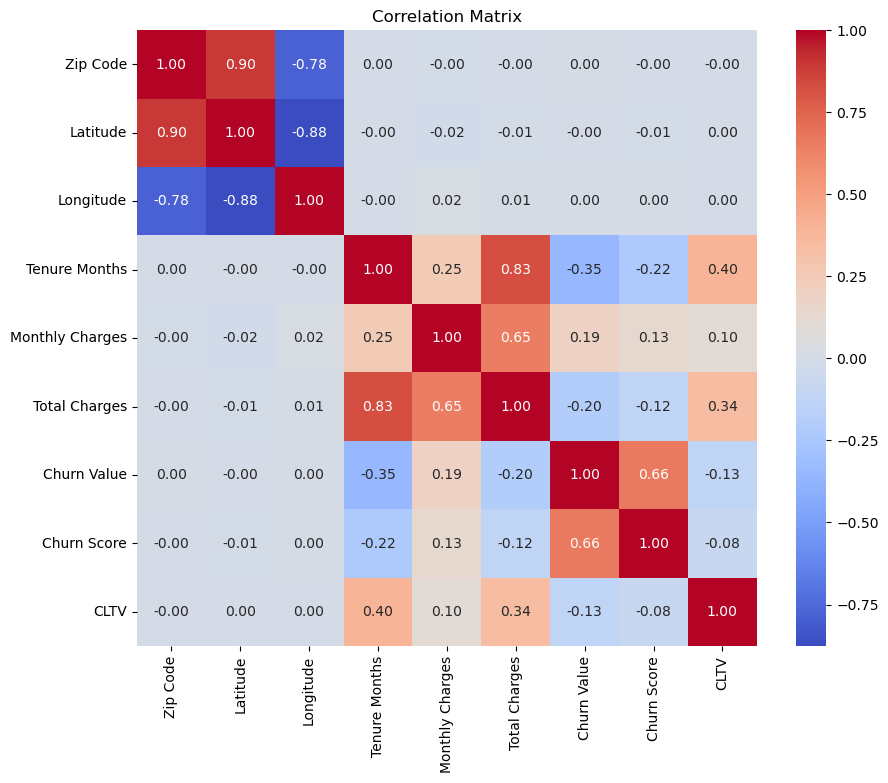

In [476]:
# Correlation Matrix
numeric_cols = db.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()
print("Correlation Matrix:")
print(corr_matrix)
# Plot a heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

From that we can see that `Tenure months` have a strong correlation between `total charges` and `CLTV`
`Monthly charges` have strong correlation with `Total charges`
`Total charges` have strong correlation between `Tenure Months`,`Monthly charges` and `CLTV`
`CLTV` have medium correlation between `Tenure Months` and `Total charges`
`Churn Value` and `Churn Score` are opposites of each other

In [479]:
# Chi-Square Test: Churn Reason vs Churn Label
# contingency table 
contingency_table = pd.crosstab(db['Churn Reason'], db['Churn Label'])
print("\nContingency Table (Churn Reason vs. Churn Label):")

# Extracting count for yes
counts = contingency_table['Yes']
total_count = counts.sum()

# df with churn reason, count, and percentage
df_counts = counts.reset_index() 
df_counts.columns = ['Churn Reason', 'Count']
df_counts['Percentage'] = (df_counts['Count'] / total_count) * 100

df_counts = df_counts.sort_values(by='Count', ascending=False)

print("\nChurn Reasons with Count and Percentage:")
print(df_counts)

# chi-square test 
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-square Test (Churn Reason vs. Churn Label):")
print(f"  Chi-square Statistic: {chi2:.2f}")
print(f"  p-value: {p:.4f}")
print(f"  Degrees of Freedom: {dof}")



Contingency Table (Churn Reason vs. Churn Label):

Churn Reasons with Count and Percentage:
                                 Churn Reason  Count  Percentage
1                  Attitude of support person    192   10.272873
4   Competitor offered higher download speeds    189   10.112360
5                Competitor offered more data    162    8.667737
7                                  Don't know    154    8.239700
3                Competitor made better offer    140    7.490637
0                Attitude of service provider    135    7.223114
2               Competitor had better devices    130    6.955591
14                        Network reliability    103    5.510968
18                    Product dissatisfaction    102    5.457464
17                             Price too high     98    5.243446
19                    Service dissatisfaction     89    4.761905
10            Lack of self-service on Website     88    4.708400
8                          Extra data charges     57    3.0497

High p-value: Suggests that any differences are likely due to random variation, and we do not have enough evidence to conclude that an association exists.

In [482]:
#the Most Popular Tenure among Churned Customers

churned_customers = db[db['Churn Label'] == 'Yes']
most_popular_tenure = churned_customers['Tenure Months'].value_counts().idxmax()
print(f"\nMost Popular Tenure Months among churned customers: {most_popular_tenure}")

db['Popular Tenure'] = (db['Tenure Months'] == most_popular_tenure)


# contingency table 
contingency_table2 = pd.crosstab(db['Churn Reason'], db['Popular Tenure'])
print("\nContingency Table (Churn Reason vs. Popular Tenure):")
popular_tenure_df = db[db['Popular Tenure'] == True]


# count of the occurrences 
churn_reason_counts = popular_tenure_df['Churn Reason'].value_counts().reset_index()
churn_reason_counts.columns = ['Churn Reason', 'Count']
churned_customers = churned_customers.copy()
churned_customers['Popular Tenure'] = (churned_customers['Tenure Months'] == most_popular_tenure)


print("Total churned customers with Popular Tenure True:",churned_customers['Popular Tenure'].sum())

churn_reason_counts['Percentage'] = (churn_reason_counts['Count'] / churned_customers['Popular Tenure'].sum()) * 100


churn_reason_counts = churn_reason_counts.sort_values(by='Count', ascending=False)
print(churn_reason_counts)


#Chi-Square Test: Churn Reason vs. Popular Tenure
chi2_2, p_2, dof_2, expected_2 = stats.chi2_contingency(contingency_table2)
print(f"\nChi-square Test (Churn Reason vs. Popular Tenure):")
print(f"  Chi-square Statistic: {chi2_2:.2f}")
print(f"  p-value: {p_2:.4f}")
print(f"  Degrees of Freedom: {dof_2}")



Most Popular Tenure Months among churned customers: 1

Contingency Table (Churn Reason vs. Popular Tenure):
Total churned customers with Popular Tenure True: 380
                                 Churn Reason  Count  Percentage
0                  Attitude of support person     53   13.947368
1                                  Don't know     33    8.684211
2                Competitor made better offer     31    8.157895
3                Attitude of service provider     30    7.894737
4   Competitor offered higher download speeds     28    7.368421
5               Competitor had better devices     28    7.368421
6                Competitor offered more data     22    5.789474
9                     Service dissatisfaction     21    5.526316
10                             Price too high     21    5.526316
8                         Network reliability     21    5.526316
7                     Product dissatisfaction     21    5.526316
11            Lack of self-service on Website     17    4

A Chi-square Statistic of 20.92 is high which would suggest a large discrepancy.
A p-value of 0.3413 is well above the common significance threshold of 0.05. This means that the observed differences are likely due to random, and there isn't strong evidence to reject the null hypothesis.

From this Contingency Table we can clearly see that we can avoid some reasons of cancelation by training company employees,offer higher download speeds,offer more data,update current devices,add self services on website etc.Which will lead for longer subscription periods of customers!

So as we know that not fixing this issues lead to a losses of  company monthly almost `25k$`  for customers who got dissatisfied at first month,and  `125k$` on average monthly!!!

In [487]:
print("Average loss on new customers:",churned_customers['Popular Tenure'].sum()*avg_monthly_charges,"$")

Average loss on new customers: 24609.443135027686 $


In [489]:
print("Average loss on Monthly Charges:",cancel*avg_monthly_charges,"$")

Average loss on Monthly Charges: 121039.60320885986 $


Let's find out is there any proves that amount of monthly charges can affect the duration of subscription:

Average Monthly Charges by Contract Type:
Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: Monthly Charges, dtype: float64

ANOVA Test Results (Monthly Charges by Contract):
F-statistic: 20.828045474730278
p-value: 9.575270975935035e-10

Pearson Correlation between Monthly Charges and Tenure Months: 0.24789985628615008


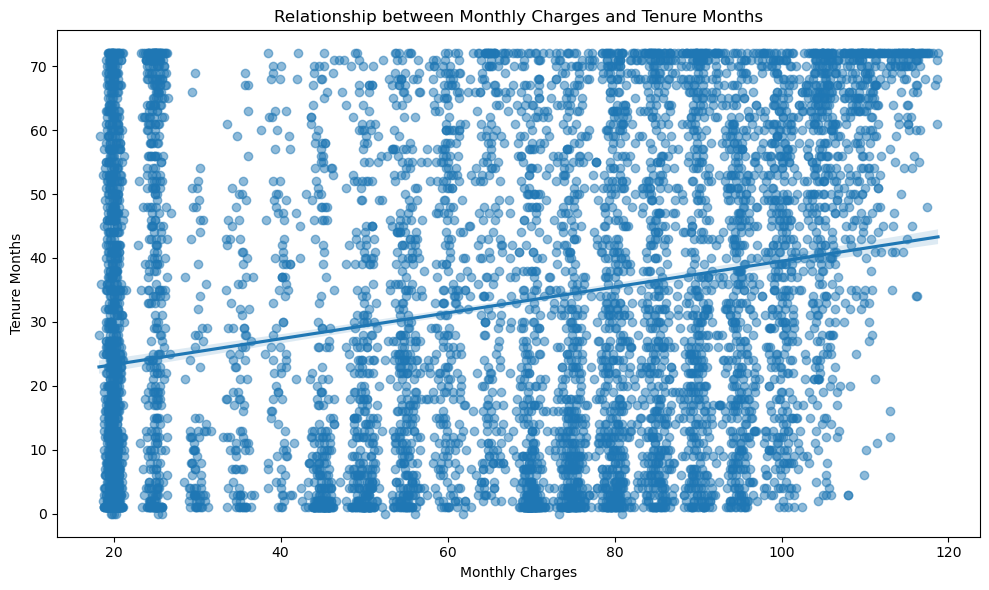


Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:          Tenure Months   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     461.0
Date:                Thu, 15 May 2025   Prob (F-statistic):           4.09e-99
Time:                        10:30:43   Log-Likelihood:                -32315.
No. Observations:                7043   AIC:                         6.463e+04
Df Residuals:                    7041   BIC:                         6.465e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const         

In [492]:
avg_monthly = db.groupby("Contract")["Monthly Charges"].mean()
print("Average Monthly Charges by Contract Type:")
print(avg_monthly)

#monthly charges for each contract type
month_to_month = db[db["Contract"] == "Month-to-month"]["Monthly Charges"]
one_year = db[db["Contract"] == "One year"]["Monthly Charges"]
two_year = db[db["Contract"] == "Two year"]["Monthly Charges"]

#one-way ANOVA test to compare the three groups
f_stat, p_val = stats.f_oneway(month_to_month, one_year, two_year)
print("\nANOVA Test Results (Monthly Charges by Contract):")
print("F-statistic:", f_stat)
print("p-value:", p_val)

#checking if monthly Charges affect the duration of subscription 

#Pearson correlation between Monthly Charges and Tenure Months
corr_coef = db['Monthly Charges'].corr(db['Tenure Months'])
print("\nPearson Correlation between Monthly Charges and Tenure Months:", corr_coef)


plt.figure(figsize=(10,6))
sns.regplot(x='Monthly Charges', y='Tenure Months', data=db, scatter_kws={'alpha':0.5})
plt.title('Relationship between Monthly Charges and Tenure Months')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure Months')
plt.tight_layout()
plt.show()

#simple linear regression using OLS
X = db['Monthly Charges']
y = db['Tenure Months']
X = sm.add_constant(X)  # Adds an intercept term to the model
model = sm.OLS(y, X).fit()
print("\nLinear Regression Results:")
print(model.summary())


# Since Monthly Charges starts around $55, re-center the predictor
db['Monthly Charges Centered'] = db['Monthly Charges'] - 55

# Fit the model using the centered predictor
X_centered = db['Monthly Charges Centered']
X_centered = sm.add_constant(X_centered)
model_centered = sm.OLS(y, X_centered).fit()

print("\nLinear Regression Results (Centered at $55):")
print(model_centered.summary())

**ANNOVA** test which compares the means of the three contract types to see if at least one group has a significantly different mean monthly charge The F-statistic of about 20.83 indicates a significant difference in the variability between groups compared to the variability within groups.The p-value is extremely small (around 9.6e-10), which is much less than the common **significance level** 0.05
These results provide strong statistical evidence that the average monthly charges differ by contract type.

A **correlation coefficient** of approximately 0.25 indicates a positive but modest linear relationship between monthly charges and the duration of the subscription.This suggests that there is a slight tendency for customers who pay lower monthly charges to have longer tenures, but the relationship isn’t very strong. Many other factors likely influence how long customers stay.

**OLS Model:**

**const = 19.27:**
If a customer were charged `55$` per month a hypothetical scenario, the model predicts they would have a tenure of about 30.39 months.It serves as the baseline for the model.
Coefficient for Monthly Charges 0.2023:
For every `$1` increase in monthly charges, the model predicts an increase of about 0.2023 months in tenure.(Which is slightly suspicious)

**R-squared 0.061:**
This tells us that approximately 6.1% of the variance in Tenure Months is explained by Monthly Charges.

**Overall:**
At `$55` per month, the predicted customer tenure is about `30.4 months`.
For every extra dollar above `$55`, customer tenure increases by about `0.20` months, on average.

The F-statistic and its associated very low p-value < 0.001 indicates that this relationship is statistically significant..
Although the effect is statistically significant, monthly charges alone explain only a small portion of the variability in subscription duration. Other factors likely have a larger impact on tenure.

### Building Predictive model

In [496]:
db.head()

,CustomerID,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Popular Tenure,Monthly Charges Centered
0,3668-QPYBK,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,...,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,False,-1.15
1,9237-HQITU,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,...,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,False,15.70
2,9305-CDSKC,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,...,Electronic check,99.65,820.50,Yes,1,86,5372,Moved,False,44.65
3,7892-POOKP,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,...,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,False,49.80
4,0280-XJGEX,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,...,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices,False,48.70


In [498]:
from sklearn.preprocessing import LabelEncoder, StandardScaler  

categorical_columns = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
    'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
    'Contract', 'Paperless Billing', 'Payment Method'
]


encoders = {}
encoding_mappings = {}


for column in categorical_columns:
    le = LabelEncoder()
    db[column] = le.fit_transform(db[column])
    encoders[column] = le
    mapping = {i: label for i, label in enumerate(le.classes_)}
    encoding_mappings[column] = mapping


db['Total Charges'] = pd.to_numeric(db['Total Charges'], errors='coerce')


db['Churn_Binary'] = (db['Churn Label'] == 'Yes').astype(int)

churn_reason_encoder = LabelEncoder()
db['Churn Reason_Encoded'] = churn_reason_encoder.fit_transform(db['Churn Reason'].fillna('Not Churned'))
encoders['Churn Reason'] = churn_reason_encoder
churn_reason_mapping = {i: label for i, label in enumerate(churn_reason_encoder.classes_)}
encoding_mappings['Churn Reason'] = churn_reason_mapping

print("\nChurn Reason Encoding:")
for code, reason in churn_reason_mapping.items():
    print(f"  {code}: {reason}")

print("\nContract Encoding:")
for code, contract in encoding_mappings['Contract'].items():
    print(f"  {code}: {contract}")


numerical_columns = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Latitude', 'Longitude', 'CLTV']
scaler = StandardScaler()
db[numerical_columns] = scaler.fit_transform(db[numerical_columns])

print("\nSample of encoded data:")
print(db.head())



Churn Reason Encoding:
  0: Attitude of service provider
  1: Attitude of support person
  2: Competitor had better devices
  3: Competitor made better offer
  4: Competitor offered higher download speeds
  5: Competitor offered more data
  6: Deceased
  7: Don't know
  8: Extra data charges
  9: Lack of affordable download/upload speed
  10: Lack of self-service on Website
  11: Limited range of services
  12: Long distance charges
  13: Moved
  14: Network reliability
  15: Not Churned
  16: Poor expertise of online support
  17: Poor expertise of phone support
  18: Price too high
  19: Product dissatisfaction
  20: Service dissatisfaction

Contract Encoding:
  0: Month-to-month
  1: One year
  2: Two year

Sample of encoded data:
   CustomerID         City  Zip Code                Lat Long  Latitude  \
0  3668-QPYBK  Los Angeles     90003  33.964131, -118.272783 -0.944111   
1  9237-HQITU  Los Angeles     90005   34.059281, -118.30742 -0.905362   
2  9305-CDSKC  Los Angeles     90

In [500]:
X_churn = db.drop(columns=[
    'CustomerID', 'City', 'Zip Code', 'Lat Long', 'Churn Label', 
    'Churn Value', 'Churn Reason', 'Churn Reason_Encoded', 'Monthly Charges Centered', 'Churn_Binary'
])
y_churn = db['Churn_Binary']

In [502]:
X

,const,Monthly Charges
0,1.0,53.85
1,1.0,70.70
2,1.0,99.65
3,1.0,104.80
4,1.0,103.70
...,...,...
7038,1.0,21.15
7039,1.0,84.80
7040,1.0,103.20
7041,1.0,29.60


In [504]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(X_churn, y_churn, test_size=0.3, random_state=42, stratify=y_churn)

print(f"\nTraining set shape: {X_train_churn.shape}")
print(f"Testing set shape: {X_test_churn.shape}")
print(f"Churn distribution in training: {y_train_churn.value_counts()}")



Training set shape: (4930, 24)
Testing set shape: (2113, 24)
Churn distribution in training: Churn_Binary
0    3622
1    1308
Name: count, dtype: int64


In [506]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Tenure Months
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 55.2 KB



Decision Tree Model for Churn Prediction:
  Cross-validation scores: [0.9178499  0.93407708 0.90669371 0.9198783  0.93407708]
  Mean CV accuracy: 0.9225 ± 0.0105
  Train accuracy: 0.9471
  Test accuracy: 0.9143

  Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1552
           1       0.81      0.88      0.85       561

    accuracy                           0.91      2113
   macro avg       0.88      0.90      0.89      2113
weighted avg       0.92      0.91      0.92      2113



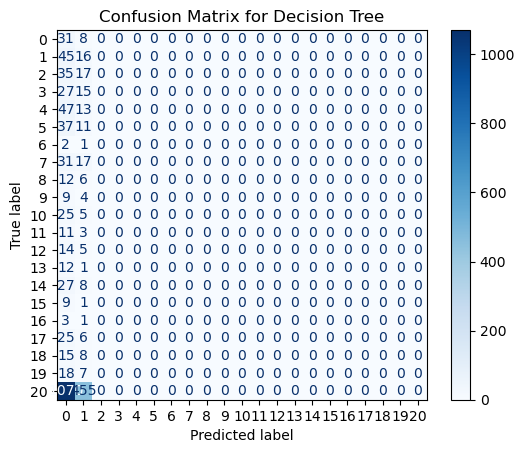


Naive Bayes Model for Churn Prediction:
  Cross-validation scores: [0.86206897 0.88742394 0.87829615 0.86004057 0.88438134]
  Mean CV accuracy: 0.8744 ± 0.0113
  Train accuracy: 0.8751
  Test accuracy: 0.8661

  Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1552
           1       0.72      0.82      0.76       561

    accuracy                           0.87      2113
   macro avg       0.82      0.85      0.84      2113
weighted avg       0.87      0.87      0.87      2113



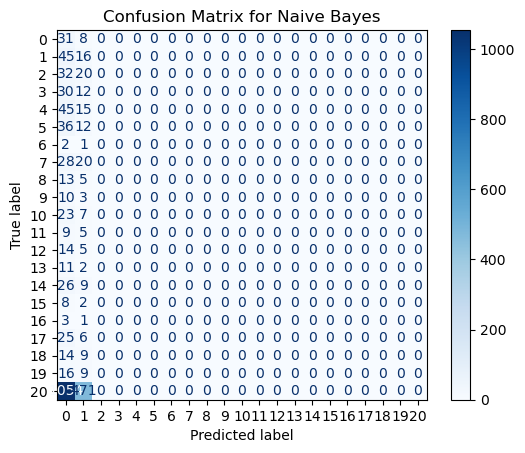


Random Forest Model for Churn Prediction:
  Cross-validation scores: [0.92900609 0.94016227 0.91075051 0.93610548 0.93914807]
  Mean CV accuracy: 0.9310 ± 0.0109
  Train accuracy: 0.9696
  Test accuracy: 0.9319

  Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1552
           1       0.86      0.88      0.87       561

    accuracy                           0.93      2113
   macro avg       0.91      0.92      0.91      2113
weighted avg       0.93      0.93      0.93      2113



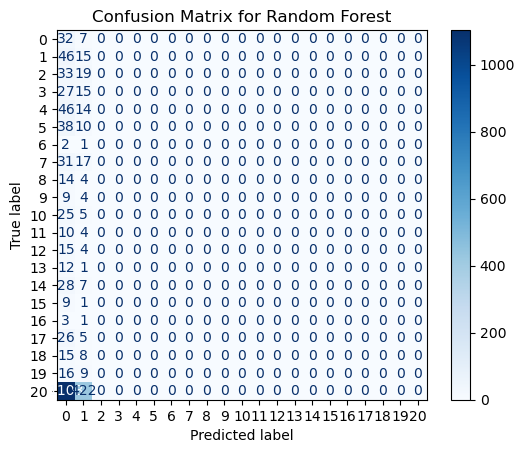


Best model for churn prediction: Random Forest


In [508]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

churn_models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=8, random_state=42),  
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42) 
}


k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_results_churn = {}

for name, model in churn_models.items():
    print(f"\n{name} Model for Churn Prediction:")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_churn, y_train_churn, cv=kf, scoring='accuracy')
    cv_results_churn[name] = {
        'cv_scores': cv_scores,
        'mean_cv_score': cv_scores.mean(),
        'std_cv_score': cv_scores.std()
    }
    print(f"  Cross-validation scores: {cv_scores}")
    print(f"  Mean CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    
    model.fit(X_train_churn, y_train_churn)
    
  
    y_pred_train = model.predict(X_train_churn)
    y_pred_test = model.predict(X_test_churn)
    
    train_accuracy = accuracy_score(y_train_churn, y_pred_train)
    test_accuracy = accuracy_score(y_test_churn, y_pred_test)

    confusion = confusion_matrix(y_test, y_pred_test, labels=all_labels)
    
    print(f"  Train accuracy: {train_accuracy:.4f}")
    print(f"  Test accuracy: {test_accuracy:.4f}")
    
  
    print("\n  Classification Report:")
    print(classification_report(y_test_churn, y_pred_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=all_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()


best_model_name = max(cv_results_churn, key=lambda x: cv_results_churn[x]['mean_cv_score'])
best_model_churn = churn_models[best_model_name]
print(f"\nBest model for churn prediction: {best_model_name}")


In [509]:
churned_customers = db[db['Churn_Binary'] == 1].copy()
print(f"Number of churned customers: {len(churned_customers)}")


X_reason = churned_customers.drop(columns=[
    'CustomerID', 'City', 'Zip Code', 'Lat Long', 'Churn Label', 
    'Churn Value', 'Churn Reason', 'Churn Reason_Encoded', 'Monthly Charges Centered', 'Churn_Binary'
])
y_reason = churned_customers['Churn Reason_Encoded']


X_train_reason, X_test_reason, y_train_reason, y_test_reason = train_test_split(
    X_reason, y_reason, test_size=0.3, random_state=42, stratify=y_reason
)

print(f"\nTraining set shape: {X_train_reason.shape}")
print(f"Testing set shape: {X_test_reason.shape}")


reason_models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=8, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
}

cv_results_reason = {}


for name, model in reason_models.items():
    print(f"\n{name} Model for Churn Reason Prediction:")
    
    try:
        cv_scores = cross_val_score(model, X_train_reason, y_train_reason, cv=min(k, 3), scoring='accuracy')
        cv_results_reason[name] = {
            'cv_scores': cv_scores,
            'mean_cv_score': cv_scores.mean(),
            'std_cv_score': cv_scores.std()
        }
        print(f"  Cross-validation scores: {cv_scores}")
        print(f"  Mean CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    except Exception as e:
        print(f"  Cross-validation failed: {e}")
   
    

    model.fit(X_train_reason, y_train_reason)
    

    y_pred_train = model.predict(X_train_reason)
    y_pred_test = model.predict(X_test_reason)
    
    train_accuracy = accuracy_score(y_train_reason, y_pred_train)
    test_accuracy = accuracy_score(y_test_reason, y_pred_test)
    
    print(f"  Train accuracy: {train_accuracy:.4f}")
    print(f"  Test accuracy: {test_accuracy:.4f}")
    

    print("\n  Classification Report:")
    print(classification_report(y_test_reason, y_pred_test, zero_division=0))



if cv_results_reason:
    best_model_name = max(cv_results_reason, key=lambda x: cv_results_reason[x]['mean_cv_score'])
    best_model_reason = reason_models[best_model_name]
    print(f"\nBest model for churn reason prediction: {best_model_name}")
else:
    best_model_name = max(reason_models, key=lambda x: accuracy_score(
        y_test_reason, reason_models[x].predict(X_test_reason)))
    best_model_reason = reason_models[best_model_name]
    print(f"\nBest model for churn reason prediction (based on test accuracy): {best_model_name}")

Number of churned customers: 1869

Training set shape: (1308, 24)
Testing set shape: (561, 24)

Decision Tree Model for Churn Reason Prediction:
  Cross-validation scores: [0.09174312 0.08486239 0.10779817]
  Mean CV accuracy: 0.0948 ± 0.0096
  Train accuracy: 0.3792
  Test accuracy: 0.0980

  Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.40      0.23        40
           1       0.12      0.17      0.14        58
           2       0.10      0.13      0.11        39
           3       0.04      0.02      0.03        42
           4       0.12      0.23      0.15        57
           5       0.15      0.12      0.13        49
           6       0.00      0.00      0.00         2
           7       0.07      0.04      0.05        46
           8       0.04      0.12      0.06        17
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00        26
          11       0.00      0.00

#### Testing predictive models on new customers info,and getting prediction for churn and their possible churn reasons

In [511]:
import random

def generate_test_customers(num_customers=5):
    random_data = []
    for i in range(num_customers):
        tenure_months = random.randint(1, 72)
        monthly_charges = round(random.uniform(20, 150), 2)
        total_charges = round(monthly_charges * tenure_months * (0.9 + 0.2 * random.random()), 2)
        
        random_customer = {
            'Gender': random.choice([0, 1]),
            'Senior Citizen': random.choice([0, 1]),
            'Partner': random.choice([0, 1]),
            'Dependents': random.choice([0, 1]),
            'Phone Service': random.choice([0, 1]),
            'Multiple Lines': random.choice([0, 1, 2]),
            'Internet Service': random.choice([0, 1, 2]),
            'Online Security': random.choice([0, 1, 2]),
            'Online Backup': random.choice([0, 1, 2]),
            'Device Protection': random.choice([0, 1, 2]),
            'Tech Support': random.choice([0, 1, 2]),
            'Streaming TV': random.choice([0, 1, 2]),
            'Streaming Movies': random.choice([0, 1, 2]),
            'Contract': random.choice([0, 1, 2]),
            'Paperless Billing': random.choice([0, 1]),
            'Payment Method': random.choice([0, 1, 2, 3]),
            'CLTV': random.randint(1000, 8000),
            'Churn Score': random.randint(10, 90),
            'Latitude': round(random.uniform(34.0, 42.0), 6),
            'Longitude': round(random.uniform(-120.0, -75.0), 6),
            'Monthly Charges': monthly_charges,
            'Total Charges': total_charges,
            'Tenure Months': tenure_months,
            'Popular Tenure': tenure_months > 12,
        }
        random_data.append(random_customer)
    return pd.DataFrame(random_data)


new_customers_raw = generate_test_customers(7)
print("Generated customer data (before scaling):")
print(new_customers_raw.head(3))

Generated customer data (before scaling):
   Gender  Senior Citizen  Partner  Dependents  Phone Service  Multiple Lines  \
0       1               0        1           1              1               1   
1       0               0        0           1              1               0   
2       1               0        1           0              1               0   

   Internet Service  Online Security  Online Backup  Device Protection  ...  \
0                 2                0              2                  2  ...   
1                 2                2              0                  2  ...   
2                 2                2              2                  1  ...   

   Paperless Billing  Payment Method  CLTV  Churn Score   Latitude  \
0                  1               2  1602           57  40.470192   
1                  0               2  6378           41  37.533157   
2                  0               2  7942           30  40.214698   

    Longitude  Monthly Charges  Tot

In [512]:
new_customers = new_customers_raw.copy()
new_customers[numerical_columns] = scaler.transform(new_customers[numerical_columns])


X_columns = X_churn.columns
new_customers_prepared = new_customers[X_columns]


churn_predictions = best_model_churn.predict(new_customers_prepared)
churn_probabilities = best_model_churn.predict_proba(new_customers_prepared)[:, 1]  # Probability of churning


results = new_customers_raw.copy()
results['Predicted_Churn'] = churn_predictions
results['Churn_Probability'] = churn_probabilities


will_churn_indices = results[results['Predicted_Churn'] == 1].index
if len(will_churn_indices) > 0:

    churn_customers = new_customers_prepared.loc[will_churn_indices]
    
    reason_predictions = best_model_reason.predict(churn_customers)
    
    reason_labels = churn_reason_encoder.inverse_transform(reason_predictions)
    
    results.loc[will_churn_indices, 'Predicted_Churn_Reason'] = reason_labels
else:
    print("No customers predicted to churn")

print("\nFinal Predictions:")
for i, row in results.iterrows():
    print(f"\nCustomer {i+1}:")
    print(f"  Tenure: {row['Tenure Months']} months")
    print(f"  Monthly Charges: ${row['Monthly Charges']:.2f}")
    print(f"  Contract Type: {row['Contract']}")
    print(f"  Churn Prediction: {'Will Churn' if row['Predicted_Churn'] == 1 else 'Will Not Churn'}")
    print(f"  Churn Probability: {row['Churn_Probability']:.2%}")
    
    if 'Predicted_Churn_Reason' in row and not pd.isna(row['Predicted_Churn_Reason']):
        print(f"  Predicted Reason: {row['Predicted_Churn_Reason']}")


Final Predictions:

Customer 1:
  Tenure: 58 months
  Monthly Charges: $83.74
  Contract Type: 2
  Churn Prediction: Will Not Churn
  Churn Probability: 7.10%

Customer 2:
  Tenure: 66 months
  Monthly Charges: $120.09
  Contract Type: 1
  Churn Prediction: Will Not Churn
  Churn Probability: 8.93%

Customer 3:
  Tenure: 67 months
  Monthly Charges: $81.26
  Contract Type: 1
  Churn Prediction: Will Not Churn
  Churn Probability: 19.02%

Customer 4:
  Tenure: 17 months
  Monthly Charges: $144.50
  Contract Type: 1
  Churn Prediction: Will Churn
  Churn Probability: 78.51%
  Predicted Reason: Don't know

Customer 5:
  Tenure: 65 months
  Monthly Charges: $126.29
  Contract Type: 1
  Churn Prediction: Will Not Churn
  Churn Probability: 5.66%

Customer 6:
  Tenure: 72 months
  Monthly Charges: $117.78
  Contract Type: 2
  Churn Prediction: Will Not Churn
  Churn Probability: 6.31%

Customer 7:
  Tenure: 54 months
  Monthly Charges: $62.18
  Contract Type: 0
  Churn Prediction: Will Not 

  0: Attitude of service provider<br>
  1: Attitude of support person<br>
  2: Competitor had better devices<br>
  3: Competitor made better offer<br>
  4: Competitor offered higher download speeds<br>
  5: Competitor offered more data<br>
  6: Deceased<br>
  7: Don't know<br>
  8: Extra data charges<br>
  9: Lack of affordable download/upload speed<br>
  10: Lack of self-service on Website<br>
  11: Limited range of services<br>
  12: Long distance charges<br>
  13: Moved<br>
  14: Network reliability<br>
  15: Not Churned<br>
  16: Poor expertise of online support<br>
  17: Poor expertise of phone support<br>
  18: Price too high<br>
  19: Product dissatisfaction<br>
  20: Service dissatisfaction<br>
----Contract Type----<br>
  0: Month-to-month<br>
  1: One year<br>
  2: Two year

### 🧾 Conclusions

This project successfully analyzed customer churn data and built a predictive system using data from a fictional telecommunications company with 7,043 customers in California.

Through **exploratory data analysis** using correlation matrices, chi-square tests, and other statistical techniques, the project was able to address the original questions:

- **What is the most popular reason for customers canceling their subscription?**  
  The most common reasons include dissatisfaction with support staff, competition, low download speeds, and limited data availability.

- **When do cancellations most commonly occur?**  
  Most churn happens within the **first month** of service.

- **Are the correlations between these factors statistically significant?**  
  - `Tenure Months` shows strong correlation with `Total Charges` and `CLTV`.
  - `Monthly Charges` also strongly correlate with `Total Charges`.
  - `Total Charges` is highly correlated with `Tenure Months`, `Monthly Charges`, and `CLTV`.

- **How do monthly charges affect the overall duration of subscriptions?**  
  Although the effect is statistically significant, **monthly charges alone explain only a small portion of the variability** in subscription duration. Other features likely play a more influential role.

- **How does the type of subscription contract influence churn?**  
  **Month-to-month** contracts show the **highest churn rate**, while one- and two-year contracts are much more stable and have significantly lower churn rates.

- **How can churn be reduced?**  
  - Improve customer support through better training  
  - Offer higher download speeds and more data  
  - Update or replace outdated devices  
  - Introduce more self-service options via the company website  

### 🤖 Machine Learning Results

In the extended part of the project, **predictive models** were developed to classify both:

1. **Whether a customer will churn**
2. **The predicted reason for their churn**

Three models were compared: **Decision Tree**, **Naive Bayes**, and **Random Forest**.  
Among them, the **Random Forest classifier consistently achieved the highest accuracy** in both churn classification and churn reason prediction.

This addition transforms the project from a purely analytical task into a **practical, data-driven decision support tool** that telecom companies can use to anticipate churn and tailor their retention strategies based on predicted reasons.

---

Let me know if you want it formatted as a PDF or Markdown, or if you'd like to add charts/tables for results!


## Further Research

Based on our exploratory data analysis and initial modeling, there are several promising directions for further research:

1. **Developing a Predictive ML Model for Churn:**
   - **Objective:**  
     A machine learning model was successfully developed to predict not only the likelihood of customer churn but also the underlying reason      for churn. Among the tested algorithms, Random Forest demonstrated the highest accuracy for both tasks.
   - **Outcome:**  
     A robust and interpretable predictive system capable of providing dual insights: whether a customer is likely to churn and why. This         dual-layered prediction enables proactive, targeted interventions tailored to specific reasons (e.g., service quality, price,           competition).

2. **Personalization and Customer Segmentation:**
   - **Goal:**  
     Use the insights from the predictive model to segment customers into different risk categories.
   - **Approach:**  
     - Develop clusters of customers based on their predicted churn risk and demographic or behavioral attributes.
     - Tailor marketing strategies, service offerings, and retention initiatives (e.g., special discounts, personalized customer support) for each segment.
   - **Outcome:**  
     Enhance customer engagement and increase subscription duration by offering individualized services that match customer needs.

3. **Continuous Model Improvement:**
   - **Data Enrichment:**  
     - Incorporate additional data sources such as customer feedback, interaction logs, and external market data.
     - Regularly update the model with new data to capture evolving customer behavior.
   - **Operational Integration:**  
     - Deploy the model in a real-time environment to continuously monitor churn risk.
     - Set up A/B tests to evaluate the impact of personalized interventions on customer retention.
   - **Outcome:**  
     A dynamic, continuously improving system that adapts to changes in customer behavior and market conditions.

By pursuing these research directions, the company can not only predict customer churn with greater accuracy but also gain actionable insights into how to improve customer retention. This holistic approach can lead to more personalized service offerings, improved customer satisfaction, and ultimately, increased customer lifetime value.


Made by Alnur Nurumov

In [520]:
!jupyter nbconvert --to pdf "customer-churn-IBM-dataset(Predictive Model).ipynb"

[NbConvertApp] Converting notebook customer-churn-IBM-dataset(Predictive Model).ipynb to pdf
[NbConvertApp] Support files will be in customer-churn-IBM-dataset(Predictive Model)_files/
[NbConvertApp] Making directory ./customer-churn-IBM-dataset(Predictive Model)_files
[NbConvertApp] Writing 161206 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1452770 bytes to customer-churn-IBM-dataset(Predictive Model).pdf
